In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sxb = pd.read_csv('sxb.csv', sep=';')

# Delete 'NaN' Rows
NullRows = sxb[sxb.isna().any(axis=1)]
sxb = sxb.dropna(how='all')


In [4]:
pd.set_option("max_rows", None)
sxb['MOIS'] = sxb['NOTIFICATION_DATE'].str[5:7].astype(int)
sxb['MONTANT'] = pd.to_numeric(sxb['MONTANT'],errors='coerce')

In [29]:
mois = range(1, 13)

seuil = 400000.0

depenses_par_mois = sxb.groupby('MOIS').sum()
depenses_par_prestataire = sxb.groupby('TITULAIRES_DENOMINATION').sum()
top_depenses_par_prestataire = depenses_par_prestataire[depenses_par_prestataire['MONTANT'] > seuil]

In [30]:
top_depenses_par_prestataire = top_depenses_par_prestataire.reset_index()

prestataires = top_depenses_par_prestataire['TITULAIRES_DENOMINATION']
montant_par_prestataire = top_depenses_par_prestataire['MONTANT']

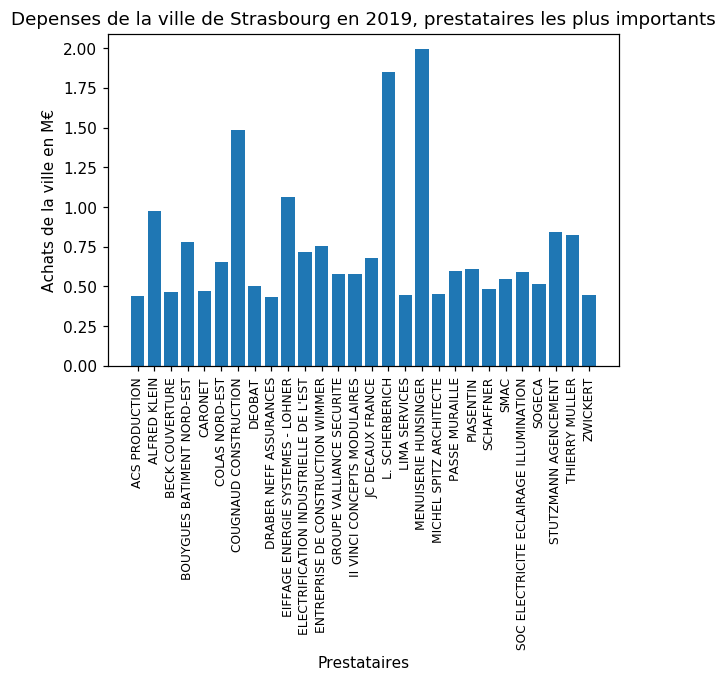

In [31]:
plt.figure(dpi=110)
plt.bar(prestataires, montant_par_prestataire / 10**6)
plt.xticks(prestataires, rotation='vertical', fontsize=8)
plt.xlabel('Prestataires')
plt.ylabel('Achats de la ville en M€')
plt.title('Depenses de la ville de Strasbourg en 2019, prestataires les plus importants')
plt.show()

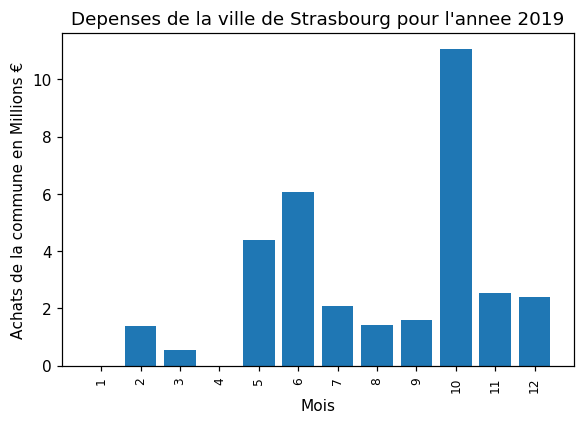

In [32]:
plt.figure(dpi=110)
plt.bar(mois, depenses_par_mois['MONTANT'] / 10**6)
plt.xticks(mois, rotation='vertical', fontsize=8)
plt.title('Depenses de la ville de Strasbourg pour l\'annee 2019')
plt.xlabel('Mois')
plt.ylabel('Achats de la commune en Millions €')
plt.show()

In [33]:
sxb.head(10)

,MARCHE_ID,NUMERO_LOT,ACHETEURS_NOM,MARCHE_OBJET,NOTIFICATION_DATE,MONTANT,TITULAIRES_DENOMINATION,MOIS
0,20-647,01,COMMUNE DE STRASBOURG,PRESTATIONS D'ASSURANCE POUR LES BESOINS DE LA...,2019-12-30,431000.00,DRABER NEFF ASSURANCES,12
1,20-647,05,COMMUNE DE STRASBOURG,PRESTATIONS D'ASSURANCE POUR LES BESOINS DE LA...,2019-12-30,4815.00,DRABER NEFF ASSURANCES,12
2,20-647,08,COMMUNE DE STRASBOURG,PRESTATIONS D'ASSURANCE POUR LES BESOINS DE LA...,2019-12-24,21655.00,ASSURANCES PILLIOT,12
3,20-647,07,COMMUNE DE STRASBOURG,PRESTATIONS D'ASSURANCE POUR LES BESOINS DE LA...,2019-12-24,19164.00,ASSURANCES PILLIOT,12
4,20-647,04,COMMUNE DE STRASBOURG,PRESTATIONS D'ASSURANCE POUR LES BESOINS DE LA...,2019-12-23,52661.00,ASSURANCES SECURITE,12
5,20-647,02,COMMUNE DE STRASBOURG,PRESTATIONS D'ASSURANCE POUR LES BESOINS DE LA...,2019-12-23,38379.00,SMACL ASSURANCES,12
6,20-647,03,COMMUNE DE STRASBOURG,PRESTATIONS D'ASSURANCE POUR LES BESOINS DE LA...,2019-12-23,37535.00,SMACL ASSURANCES,12
7,DC5C6E9A-48BF-40C1-9F15-A806B8C47FB1,None,COMMUNE DE STRASBOURG,REALISATION D'UN SITE FUTSAL AU GYMNASE KARINE...,2019-12-17,436718.62,ACS PRODUCTION,12
8,5F0A7CD2-8240-4EE7-B45F-08D3A202C577,None,COMMUNE DE STRASBOURG,TRAVAUX DE CREATION D'UNE SALLE DE GYMNASTIQUE...,2019-12-11,54269.82,DECOPEINT,12
9,CBBABE58-222E-4015-A73C-32A58214F9C8,None,COMMUNE DE STRASBOURG,TRAVAUX DE CREATION D'UNE SALLE DE GYMNASTIQUE...,2019-12-11,14600.00,ETABLISSEMENTS ROBERT GEISTEL,12


In [34]:
depenses_par_projet = sxb.groupby('MARCHE_OBJET').sum()
top_depenses_par_projet = depenses_par_projet[depenses_par_projet['MONTANT'] > seuil]
top_depenses_par_projet = top_depenses_par_projet.reset_index()

In [35]:
top_projets = top_depenses_par_projet['MARCHE_OBJET']

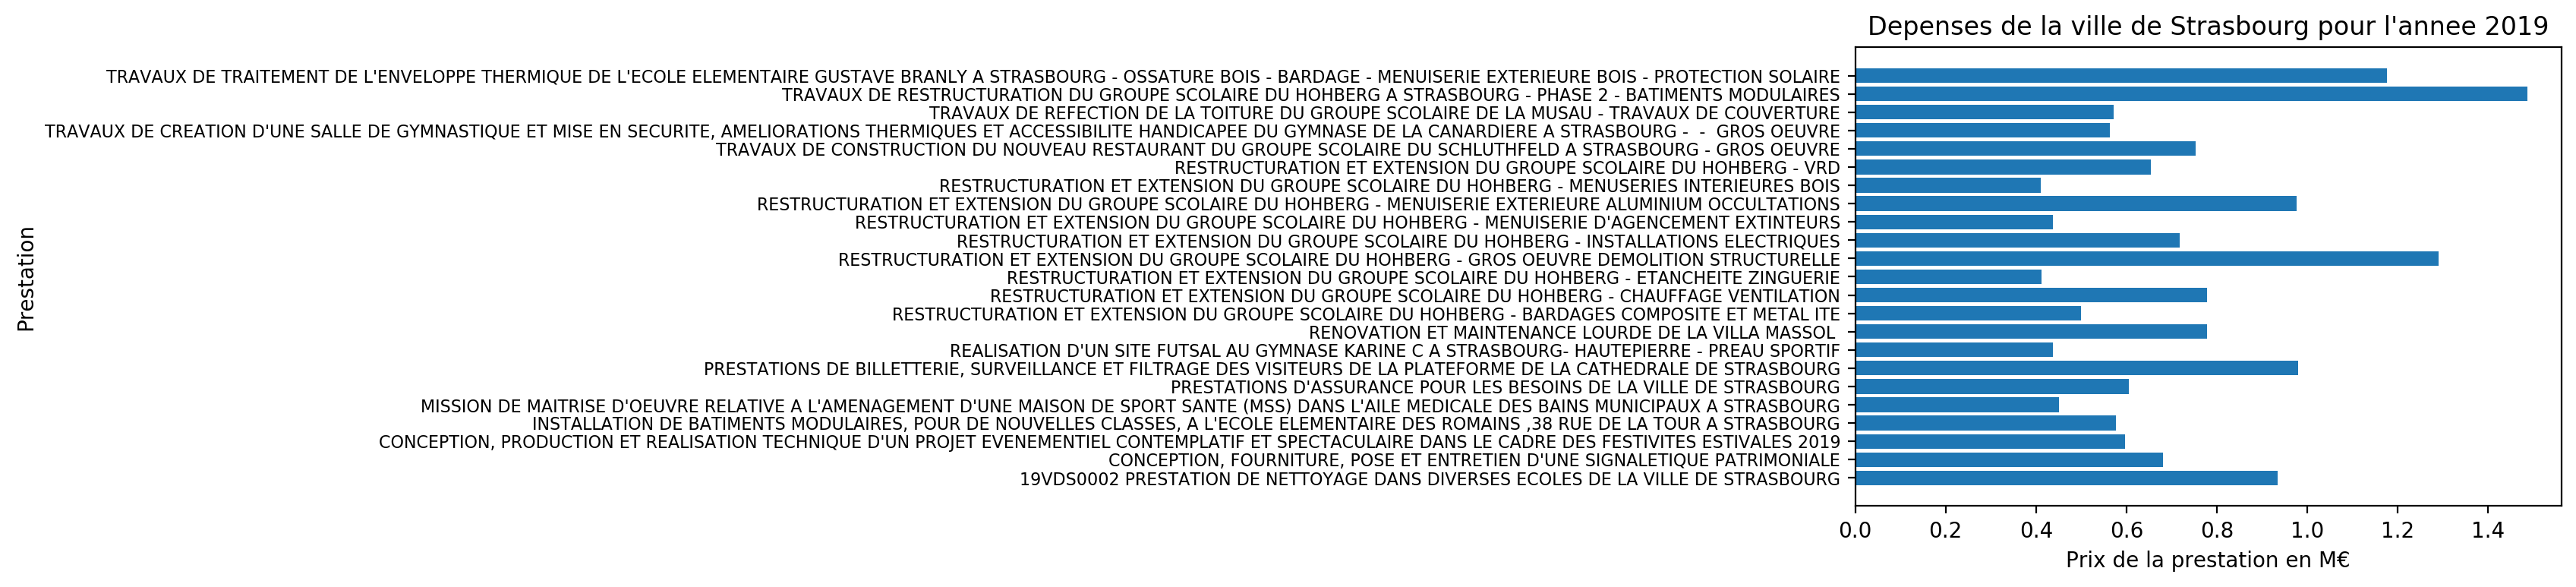

In [38]:
plt.figure(dpi=200)
plt.barh(top_projets, top_depenses_par_projet['MONTANT'] / 10**6)
plt.title('Depenses de la ville de Strasbourg pour l\'annee 2019')
plt.yticks(top_projets, fontsize=8)
plt.ylabel('Prestation')
plt.xlabel('Prix de la prestation en M€')
plt.show()